In [26]:
%matplotlib notebook

In [27]:
import statsmodels.api as sm
from scipy.stats import linregress
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [28]:
percent=[]
number=[]
# city=["NY","DC"]
Years=[2012,2013,2014,2015,2016,2017]
base="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/2014/national.json?ethnicity=T&medicare_status=A"

base_url="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/"
query="/national.json?ethnicity=T&medicare_status=A"

In [29]:
# find vaccinaion for each year (2012-2917)

for x in Years:
#     data=requests.get(base_url+str(x)+query).json()
    data=requests.get(f"https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/{x}/national.json?ethnicity=T&medicare_status=A").json()
    percent_get_vacinne=data[0]["percentage"]
    num_get_vaccine=data[0]["count"]
    percent.append(percent_get_vacinne)
    number.append(num_get_vaccine)
    print(json.dumps(data,indent=4))
print(f"the number of people get vaccine each year: {number}")
print(f"the proportion of people get vaccine each year: {percent}")

[
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",
        "year": 2012,
        "week": 52,
        "week_start": "03AUG",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 26043833,
        "percentage": 0.512448,
        "disparity": 0.0
    }
]
[
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",
        "year": 2013,
        "week": 52,
        "week_start": "02AUG",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 27278865,
        "percentage": 0.505152,
        "disparity": 0.0
    }
]
[
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",
        "year": 2014,
        "week": 52,
        "week_start": "01AUG",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 28830312,
        "percentage": 0.501874,
        "disparity": 0.0
    }
]
[
    {
        "short_name": "US",
        "name": "National",
        "fip

<IPython.core.display.Javascript object>


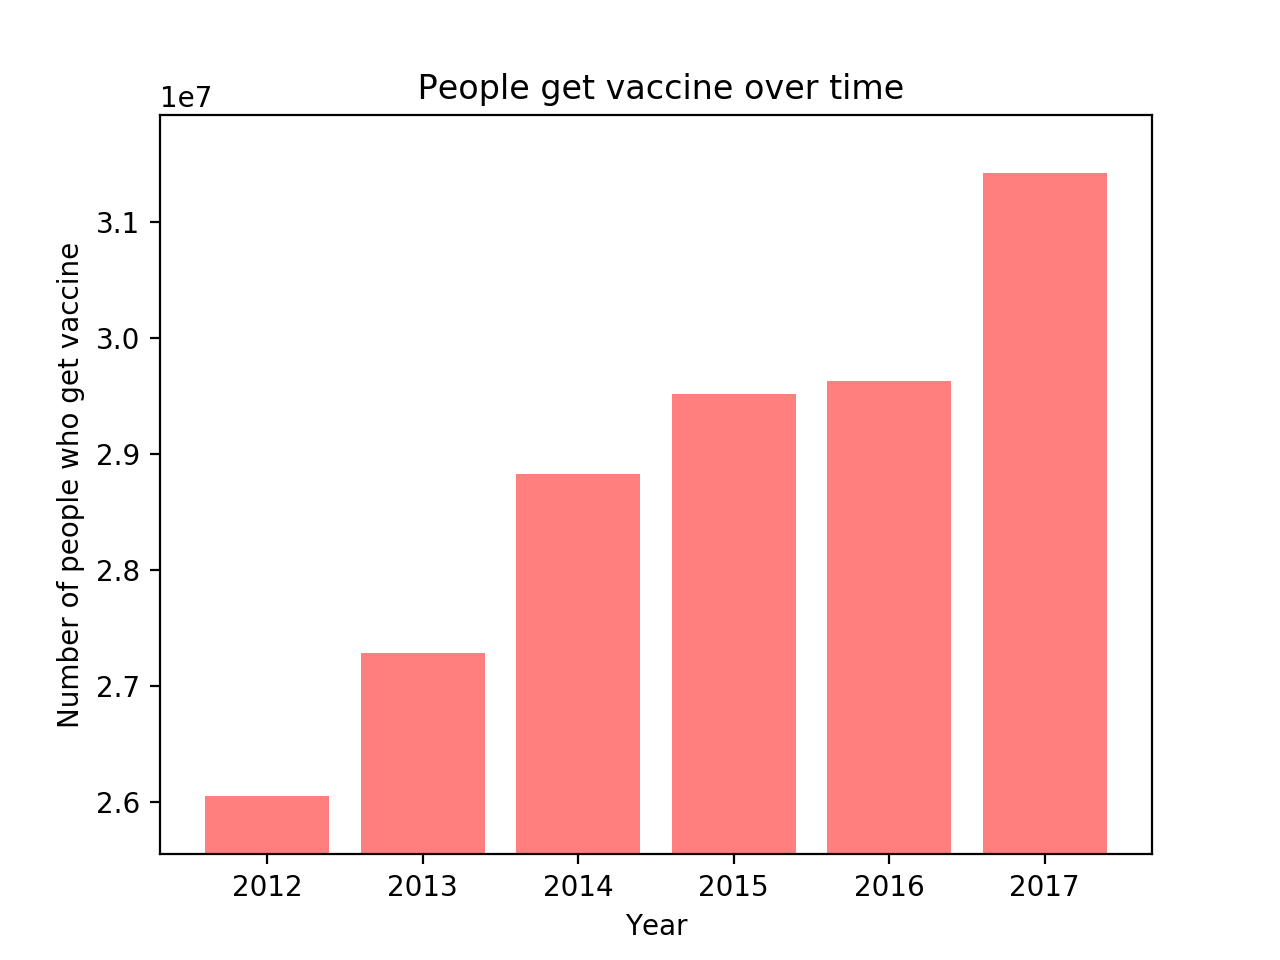

Text(0.5,1,' People get vaccine over time')

In [30]:
Years=[2012,2013,2014,2015,2016,2017]
number=[26043833, 27278865, 28830312, 29517227, 29624654, 31422333]
x_axis = np.arange(len(number))
plt.bar(x_axis,number , color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Years)
plt.ylim(min(number)-500000, max(number)+500000)
plt.xlabel("Year")
plt.ylabel("Number of people who get vaccine")
plt.title(" People get vaccine over time") 
# note that only 25 weeks in 2017's data


In [31]:
# analysis vaccination rate of every week to find the trend within each year

Years=[2012,2013,2014,2015,2016,2017]  #there are only 25 weeks in 2017, 10 weeks in 2012
year=[]
week=[]
week_percent=[]

trend_url="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/trends/"
query2="/national.json?ethnicity=T&medicare_status=A"
for y in Years:    
    week_data=requests.get(trend_url+str(y)+query2).json()
#     print(json.dumps(week_data,indent=4))
#     print(len(week_data))
    for i in range(len(week_data)) :
        year_order=week_data[i]["year"]
        year.append(year_order)
        week_order=week_data[i]["week"]
        week.append(week_order)
        percent_each_week=week_data[i]["percentage"]
        week_percent.append(percent_each_week)
#         print(year_order,week_order,percent_each_week)
#     print(f"the vaccination rate for {year_order} week {week_order} is {percent_each_week}" )
# # now I want to put these year,week, percent data into dataframe
df=pd.DataFrame({"Year":year,"Week":week,"Vaccination rate":week_percent})

df.to_csv("VaccinationRate.csv",index=False)
df.head()



,Year,Week,Vaccination rate
0,2012,43,0.512392
1,2012,44,0.512401
2,2012,45,0.512409
3,2012,46,0.512415
4,2012,47,0.512419


In [32]:
vaccination_df = pd.read_csv('VaccinationRate.csv')
vaccination_df.head()


,Year,Week,Vaccination rate
0,2012,43,0.512392
1,2012,44,0.512401
2,2012,45,0.512409
3,2012,46,0.512415
4,2012,47,0.512419


In [33]:
data=df.set_index(["Year"])
data.head()

,Week,Vaccination rate
Year,,
2012,43,0.512392
2012,44,0.512401
2012,45,0.512409
2012,46,0.512415
2012,47,0.512419


In [34]:
# data2012=df.loc["2012",:] I don't know why this did not work
data2012=data.iloc[0:10,:]
data2013=data.iloc[10:62,:]
data2014=data.iloc[62:114,:]
data2015=data.iloc[114:114+52,:]
data2016=data.iloc[114+52:114+52+52,:]
data2017=data.iloc[114+52+52:114+52+52+25,:]
data2017.head()

,Week,Vaccination rate
Year,,
2017,1,0.001697
2017,2,0.005075
2017,3,0.010479
2017,4,0.020088
2017,5,0.036383


<IPython.core.display.Javascript object>


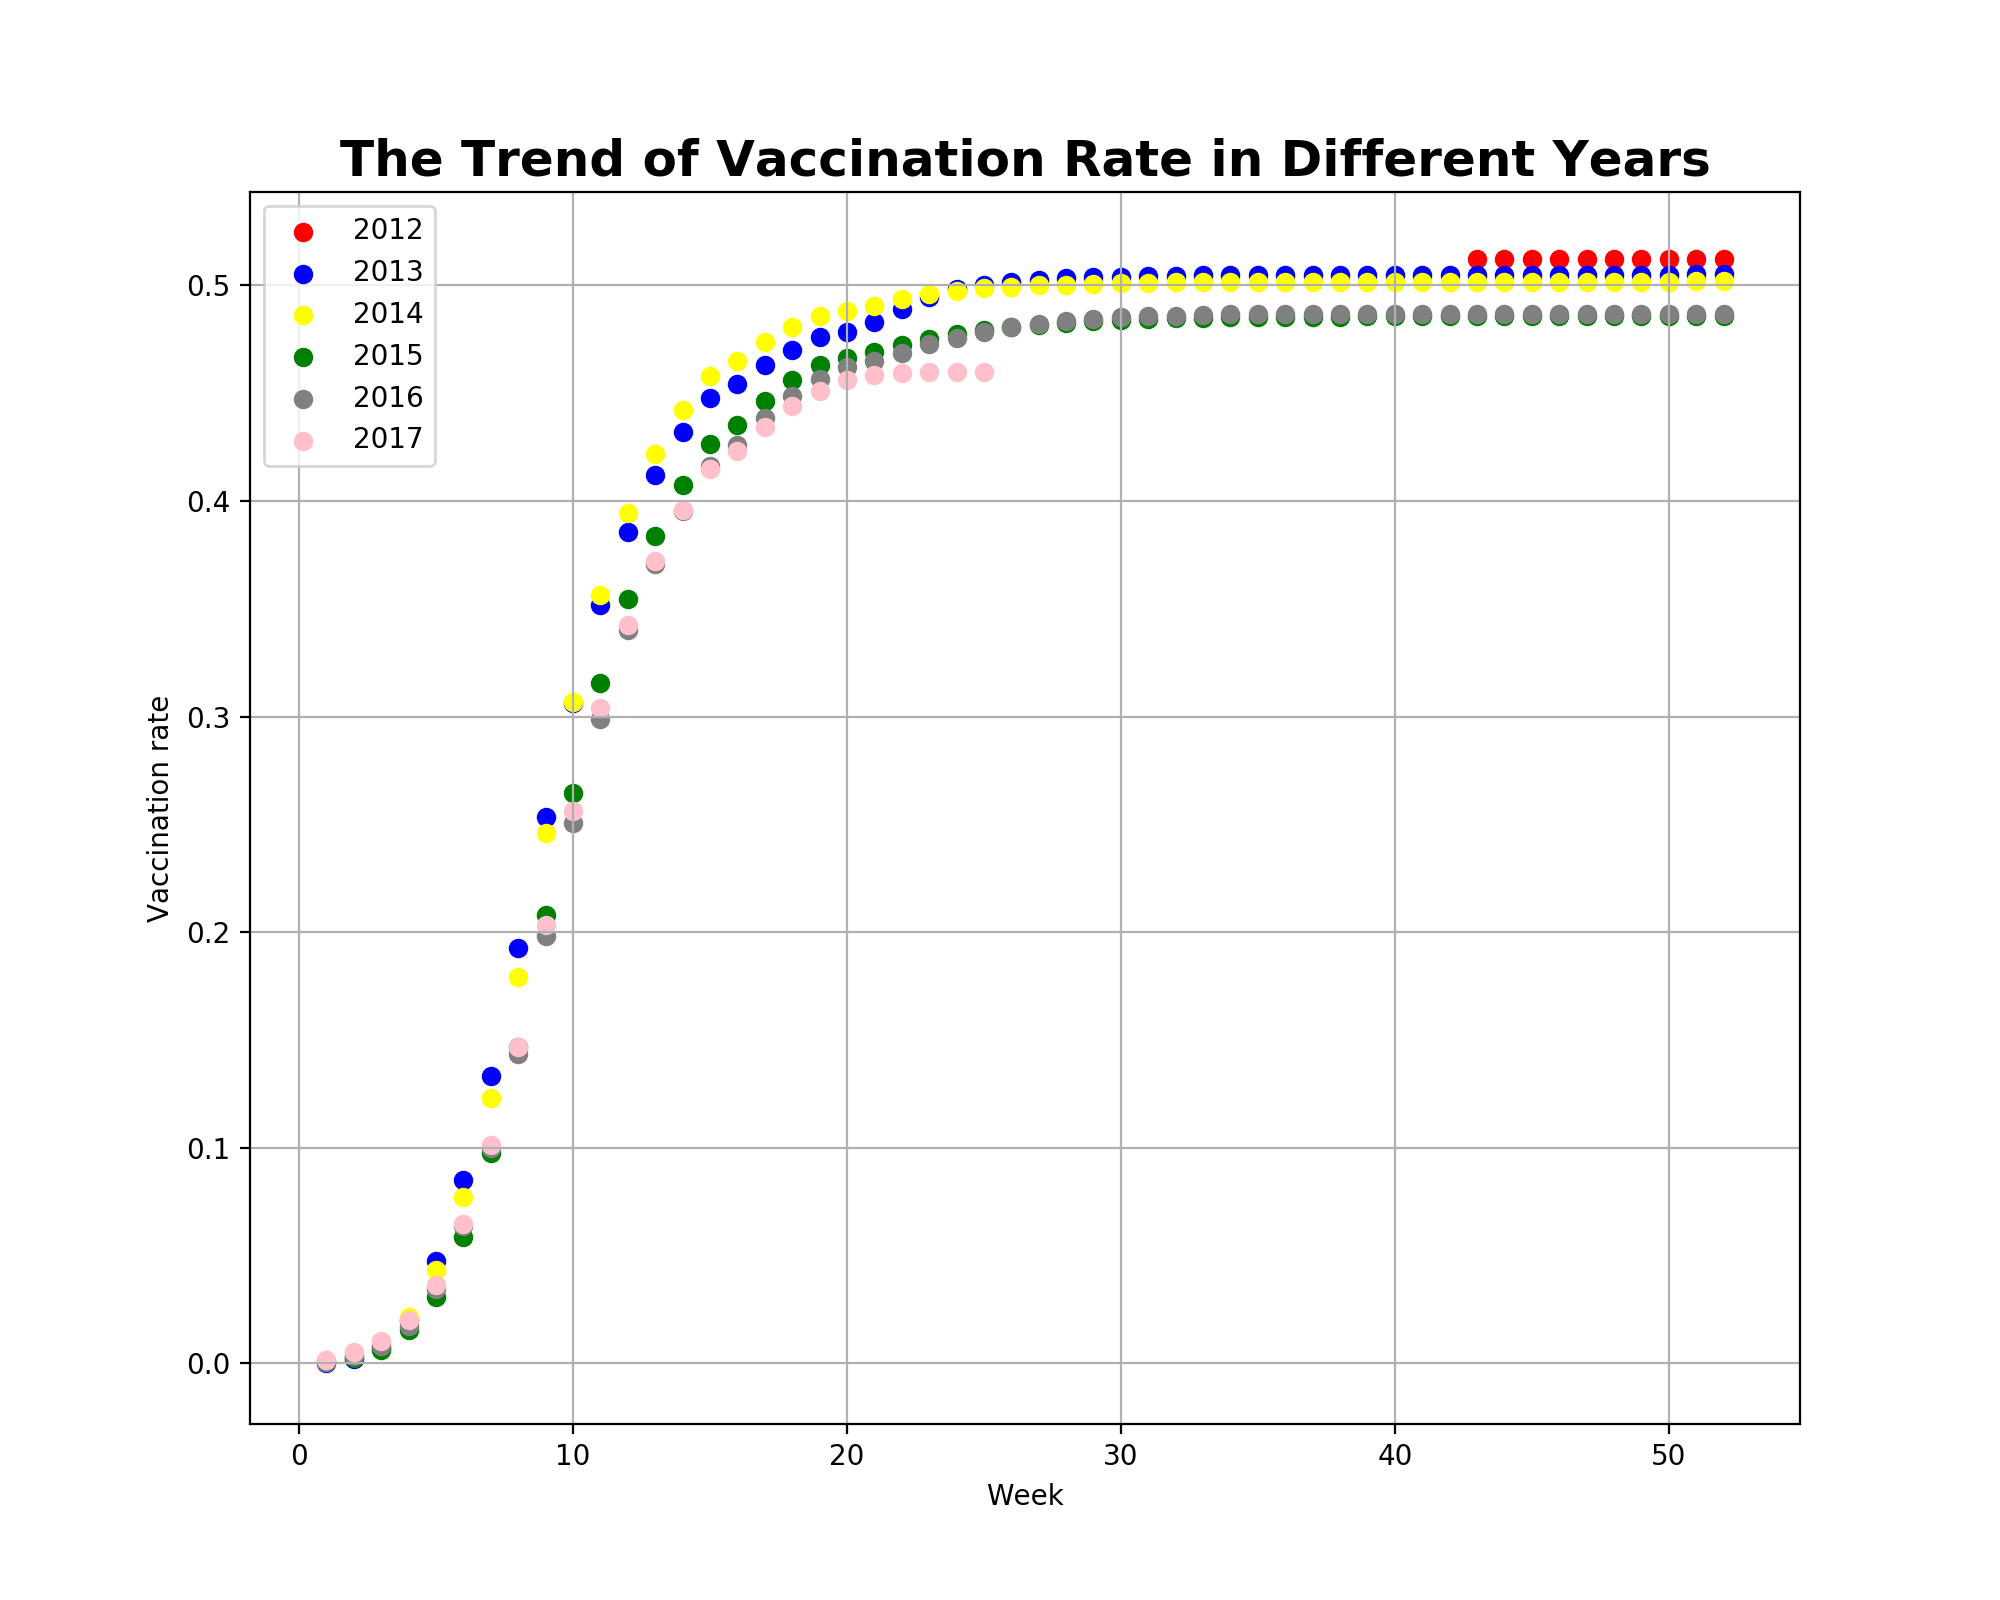

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(data2012["Week"], data2012["Vaccination rate"],color="red",label="2012")
plt.scatter(data2013["Week"], data2013["Vaccination rate"],color="blue",label="2013")
plt.scatter(data2014["Week"], data2014["Vaccination rate"],color="yellow",label="2014")
plt.scatter(data2015["Week"], data2015["Vaccination rate"],color="green",label="2015")
plt.scatter(data2016["Week"], data2016["Vaccination rate"],color="grey",label="2016")
plt.scatter(data2017["Week"], data2017["Vaccination rate"],color="pink",label="2017")

plt.xlabel('Week')
plt.ylabel('Vaccination rate')
plt.title("The Trend of Vaccination Rate in Different Years", fontsize=18, fontweight="bold")
plt.legend(loc="best")
plt.show()
plt.grid()


<IPython.core.display.Javascript object>


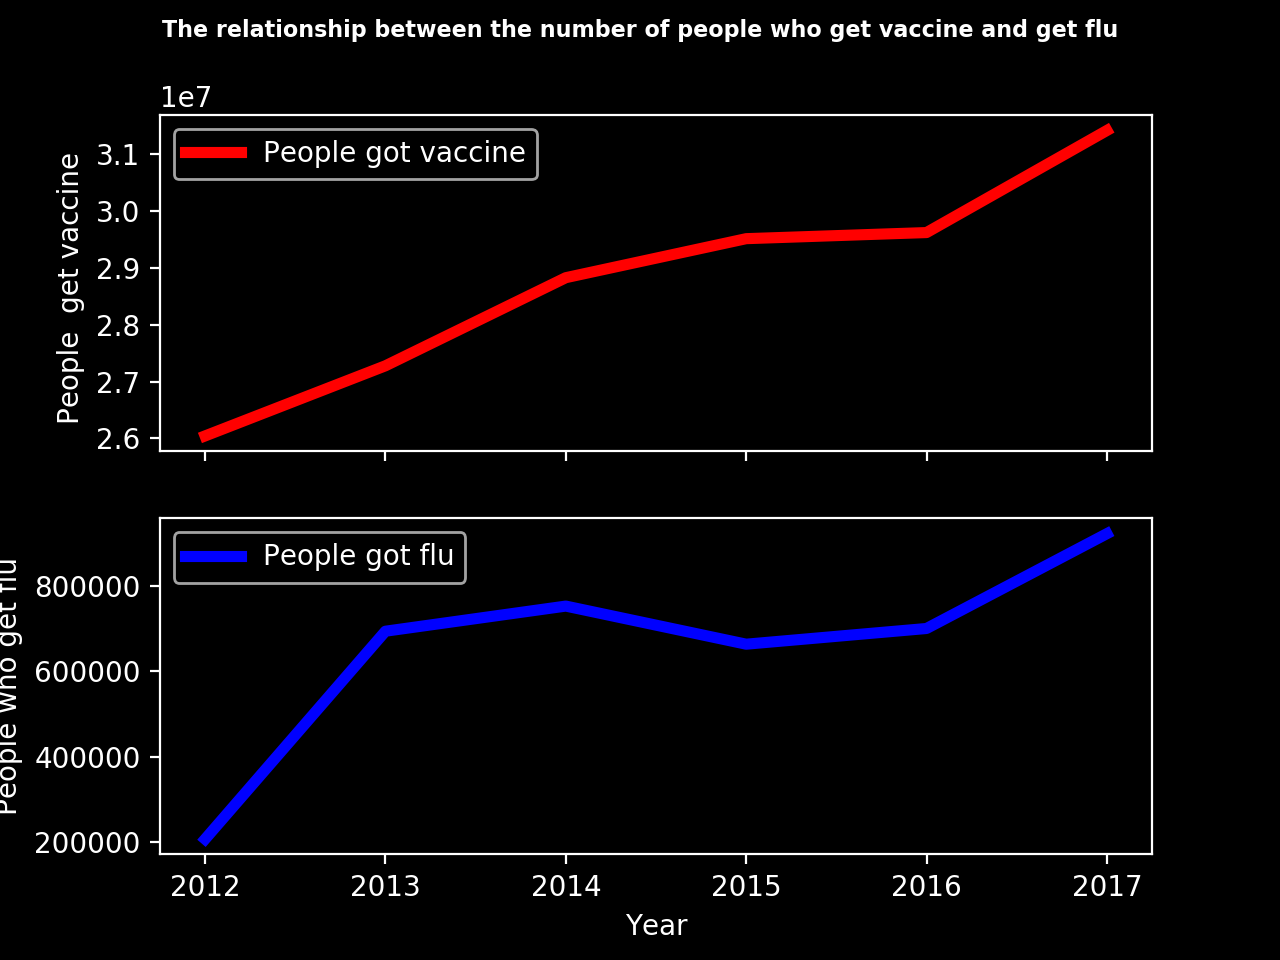

In [64]:
# # put them in the same scale, maybe a little bit misleading...
with plt.style.context(('dark_background')):

    year=[2012,2013,2014,2015,2016,2017]
    people_get_vaccine=[26043833, 27278865, 28830312, 29517227, 29624654, 31422333]
    people_get_flu=[206671,694012,752904,663606,700399,922648]

    # with plt.style.context(('dark_background')):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle("The relationship between the number of people who get vaccine and get flu", fontsize=8, fontweight="bold")

    ax1.plot(year, people_get_vaccine,color="red",label="People got vaccine",linewidth=4)
    ax1.set_ylabel("People  get vaccine ")
    ax2.plot(year, people_get_flu,color="blue",label="People got flu",linewidth=4)
    ax2.set_ylabel("People who get flu")
    ax2.set_xlabel("Year")

    ax1.legend(loc="best")
    ax2.legend(loc="best")
    plt.show()









# fig,ax =plt.subplots(figsize=(10, 8))
# ax.plot(year, people_get_vaccine,color="red",label="People got vaccine")
# ax.set_ylabel("The Trend of people who get vaccine per year")
# ax1=ax.twinx()

# ax1.plot(year, people_get_flu,color="blue",label="People got flu")
# ax1.set_ylabel("The Trend of people who get flu per year")
# ax1.set_xlabel("Year")

# plt.title("Relationship between the number of people who get vaccine and get flu")
# plt.show()


# # fig, ax = plt.subplots(figsize=(10, 8))

# # plt.plot(year, people_get_vaccine,color="red",label="People got vaccine")
# # plt.plot(year, people_get_flu,color="blue",label="People got flu")

# # plt.xlabel('Year')
# # plt.ylabel('Number of people')
# plt.legend(loc="best")
# plt.show()

# Note that when run a regression on these two varibles, the result is statistically unsignificant.(P-value=0.055) 

In [37]:
# find people who get flu
flu_df=pd.read_csv("get_flu.csv")
flu_df.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,2012,43,1.37842,1.36688,3346,2012,X,4268,771,516,10913,1958,798388
1,National,X,2012,44,1.50085,1.50535,3326,2032,X,4422,797,484,11061,1929,734781
2,National,X,2012,45,1.65163,1.61273,3733,2330,X,5145,925,541,12674,1974,785871
3,National,X,2012,46,1.76746,1.75208,4034,2569,X,5526,897,597,13623,1966,777534
4,National,X,2012,47,2.30609,2.33365,4651,2824,X,5387,1105,683,14650,1968,627772


In [38]:
get_flu=flu_df.groupby(["YEAR"]).agg({"ILITOTAL":"sum","TOTAL PATIENTS":"sum"})
get_flu


# year_2012=flu_df.loc[(flu_df.loc["YEAR"]==2012),"ILITOTAL"]

,ILITOTAL,TOTAL PATIENTS
YEAR,,
2012,206671,7564828
2013,694012,35668788
2014,716013,38213152
2015,663606,37144079
2016,700399,38219921
2017,922648,41443859


<IPython.core.display.Javascript object>


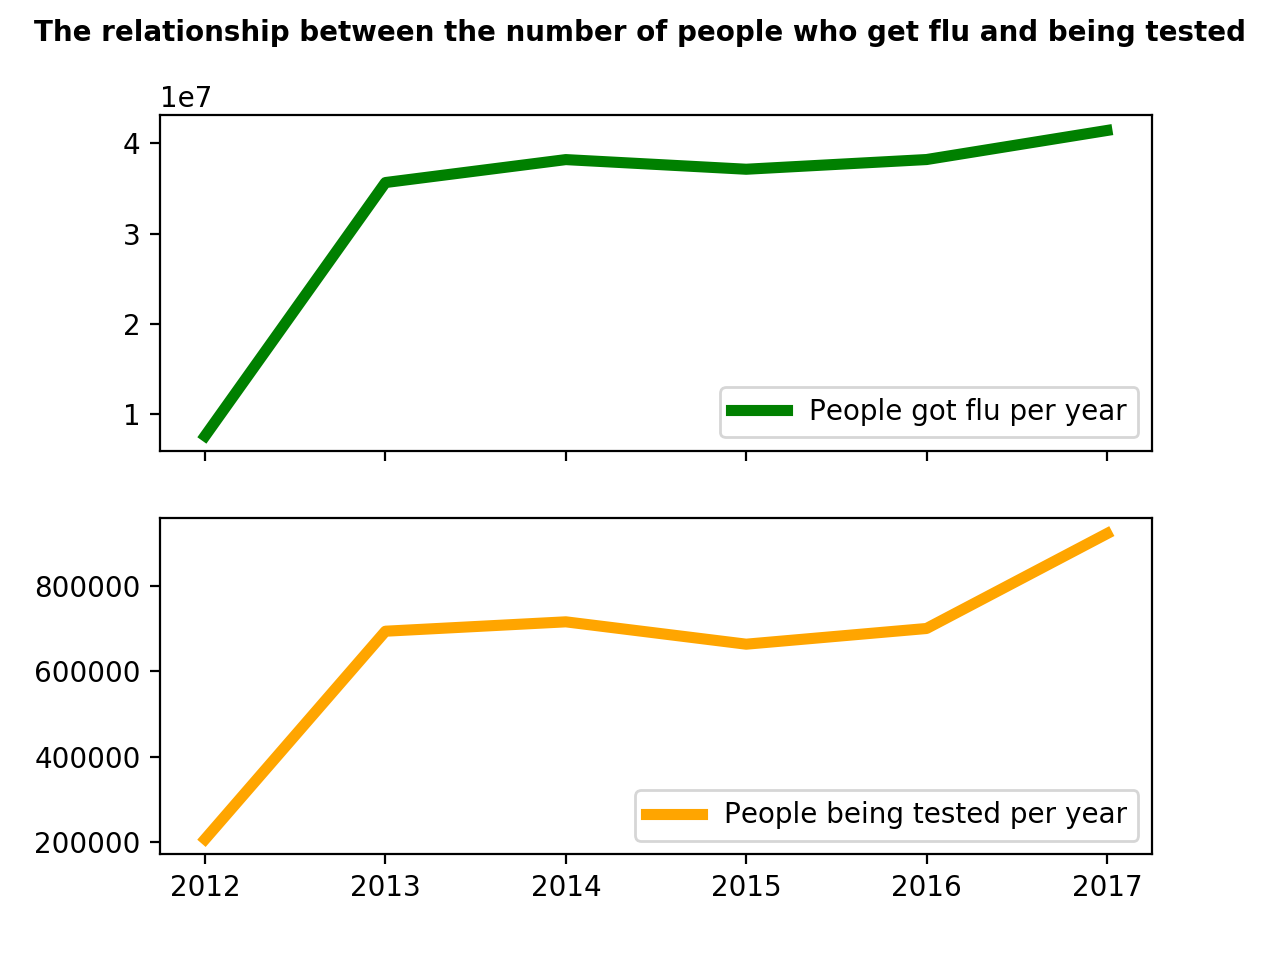

In [50]:
# with plt.style.context(('dark_background')):

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("The relationship between the number of people who get flu and being tested", fontsize=10, fontweight="bold")

ax1.plot(get_flu.index,get_flu["TOTAL PATIENTS"], color="green",label="People got flu per year", linewidth=4)
ax2.plot(get_flu.index,get_flu["ILITOTAL"], color="orange",label="People being tested per year", linewidth=4)

ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
plt.show()
# ###### The reason why the number of people who get flu is increasing maybe just because the number of patients
# # who get tested is increasing, not because of the ineffectiveness of vaccine.


In [51]:
Years=[2012,2013,2014,2015,2016,2017]  #there are only 25 weeks in 2017, 10 weeks in 2012
year=[]
week=[]
week_percent=[]

trend_url="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/trends/"
query2="/national.json?ethnicity=T&medicare_status=A"
for y in Years:    
    week_data=requests.get(trend_url+str(y)+query2).json()
    print(json.dumps(week_data,indent=4))

[
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",
        "year": 2012,
        "week": 43,
        "week_start": "01JUN",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 26043833,
        "percentage": 0.512392,
        "disparity": 0.0
    },
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",
        "year": 2012,
        "week": 44,
        "week_start": "08JUN",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 26043833,
        "percentage": 0.512401,
        "disparity": 0.0
    },
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",
        "year": 2012,
        "week": 45,
        "week_start": "15JUN",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 26043833,
        "percentage": 0.512409,
        "disparity": 0.0
    },
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",


[
    {
        "short_name": "US",
        "name": "National",
        "fips": "00",
        "year": 2015,
        "week": 1,
        "week_start": "08AUG",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 29517227,
        "percentage": 0.000660834,
        "disparity": 0.0
    },
    {
        "short_name": "US",
        "name": "National",
        "fips": "00",
        "year": 2015,
        "week": 2,
        "week_start": "15AUG",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 29517227,
        "percentage": 0.00238857,
        "disparity": 0.0
    },
    {
        "short_name": "US",
        "name": "National",
        "fips": "00",
        "year": 2015,
        "week": 3,
        "week_start": "22AUG",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 29517227,
        "percentage": 0.00620848,
        "disparity": 0.0
    },
    {
        "short_name": "US",
        "name": "National",
        "fips"

In [52]:
Years=[2012,2013,2014,2015,2016,2017]  #there are only 25 weeks in 2017, 10 weeks in 2012
year=[]
week=[]
week_percent=[]
week_number=[]

trend_url="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/trends/"
query2="/national.json?ethnicity=T&medicare_status=A"
for y in Years:    
    week_data=requests.get(trend_url+str(y)+query2).json()
#     print(json.dumps(week_data,indent=4))
#     print(len(week_data))
    for i in range(len(week_data)) :
        year_order=week_data[i]["year"]
        year.append(year_order)
        week_order=week_data[i]["week"]
        week.append(week_order)
        percent_each_week=week_data[i]["percentage"]
        week_percent.append(percent_each_week)
        
#         print(total_number_in_a_year)
#     print(f"the vaccination rate for {year_order} week {week_order} is {percent_each_week}" )
# # now I want to put these year,week, percent data into dataframe
df=pd.DataFrame({"Year":year,"Week":week,"percentage of got vaccine each week":week_percent})
df.head()

,Year,Week,percentage of got vaccine each week
0,2012,43,0.512392
1,2012,44,0.512401
2,2012,45,0.512409
3,2012,46,0.512415
4,2012,47,0.512419


In [53]:
# Years=[2012,2013,2014,2015,2016,2017]  #there are only 25 weeks in 2017, 10 weeks in 2012
# year=[]
# week=[]
# week_percent=[]
# week_number=[]

# trend_url="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/trends/"
# query2="/national.json?ethnicity=T&medicare_status=A"
# for y in Years:    
#     week_data=requests.get(trend_url+str(y)+query2).json()
# #     print(json.dumps(week_data,indent=4))
# #     print(len(week_data))
#     for i in range(len(week_data)) :
#         year_order=week_data[i]["year"]
#         year.append(year_order)
#         week_order=week_data[i]["week"]
#         week.append(week_order)
#         percent_each_week=week_data[i]["percentage"]
#         week_percent.append(percent_each_week)
#         total_number_in_a_year=week_data[i]["count"]
#         number_in_a_week=round(percent_each_week*total_number_in_a_year*0.01,0)
#         week_number.append(number_in_a_week)
# #         print(total_number_in_a_year)
# #     print(f"the vaccination rate for {year_order} week {week_order} is {percent_each_week}" )
# # # now I want to put these year,week, percent data into dataframe
# df=pd.DataFrame({"Year":year,"Week":week,"Number of people got vaccine":week_number})
# df.head()


In [54]:
target_getflu=flu_df.iloc[0:244,:]
target_getflu.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,2012,43,1.37842,1.36688,3346,2012,X,4268,771,516,10913,1958,798388
1,National,X,2012,44,1.50085,1.50535,3326,2032,X,4422,797,484,11061,1929,734781
2,National,X,2012,45,1.65163,1.61273,3733,2330,X,5145,925,541,12674,1974,785871
3,National,X,2012,46,1.76746,1.75208,4034,2569,X,5526,897,597,13623,1966,777534
4,National,X,2012,47,2.30609,2.33365,4651,2824,X,5387,1105,683,14650,1968,627772


In [55]:
target_getflu=flu_df.iloc[0:243,:]
target_getflu
percent_get_flu=target_getflu["ILITOTAL"]/target_getflu["TOTAL PATIENTS"]
percent_get_flu.head()


0    0.013669
1    0.015053
2    0.016127
3    0.017521
4    0.023336
dtype: float64

In [56]:
target_df=pd.DataFrame({"Year":year,"Week":week,"percentage of people got vaccine":week_percent,"percentage of people got flu":percent_get_flu})
target_df.head()

,Year,Week,percentage of people got vaccine,percentage of people got flu
0,2012,43,0.512392,0.013669
1,2012,44,0.512401,0.015053
2,2012,45,0.512409,0.016127
3,2012,46,0.512415,0.017521
4,2012,47,0.512419,0.023336


In [57]:
import statsmodels.api as sm

X = target_df["percentage of people got vaccine"]
y = target_df["percentage of people got flu"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     percentage of people got flu   R-squared:                       0.465
Model:                                      OLS   Adj. R-squared:                  0.462
Method:                           Least Squares   F-statistic:                     210.0
Date:                          Wed, 10 Oct 2018   Prob (F-statistic):           1.10e-34
Time:                                  19:48:54   Log-Likelihood:                 659.88
No. Observations:                           243   AIC:                            -1318.
Df Residuals:                               242   BIC:                            -1314.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
percentage of people got vaccine     0.0348      0.002     14.492      0.000       0.030       0.040
==============================================================================
Omnibus:                       42.136   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.513
Skew:                           1.200   Prob(JB):                     1.19e-13
Kurtosis:                       3.339   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(target_df["percentage of people got vaccine"],target_df["percentage of people got flu"])
# m_fit = m_slope * target_df["percentage of people got vaccine"] + m_int


<IPython.core.display.Javascript object>


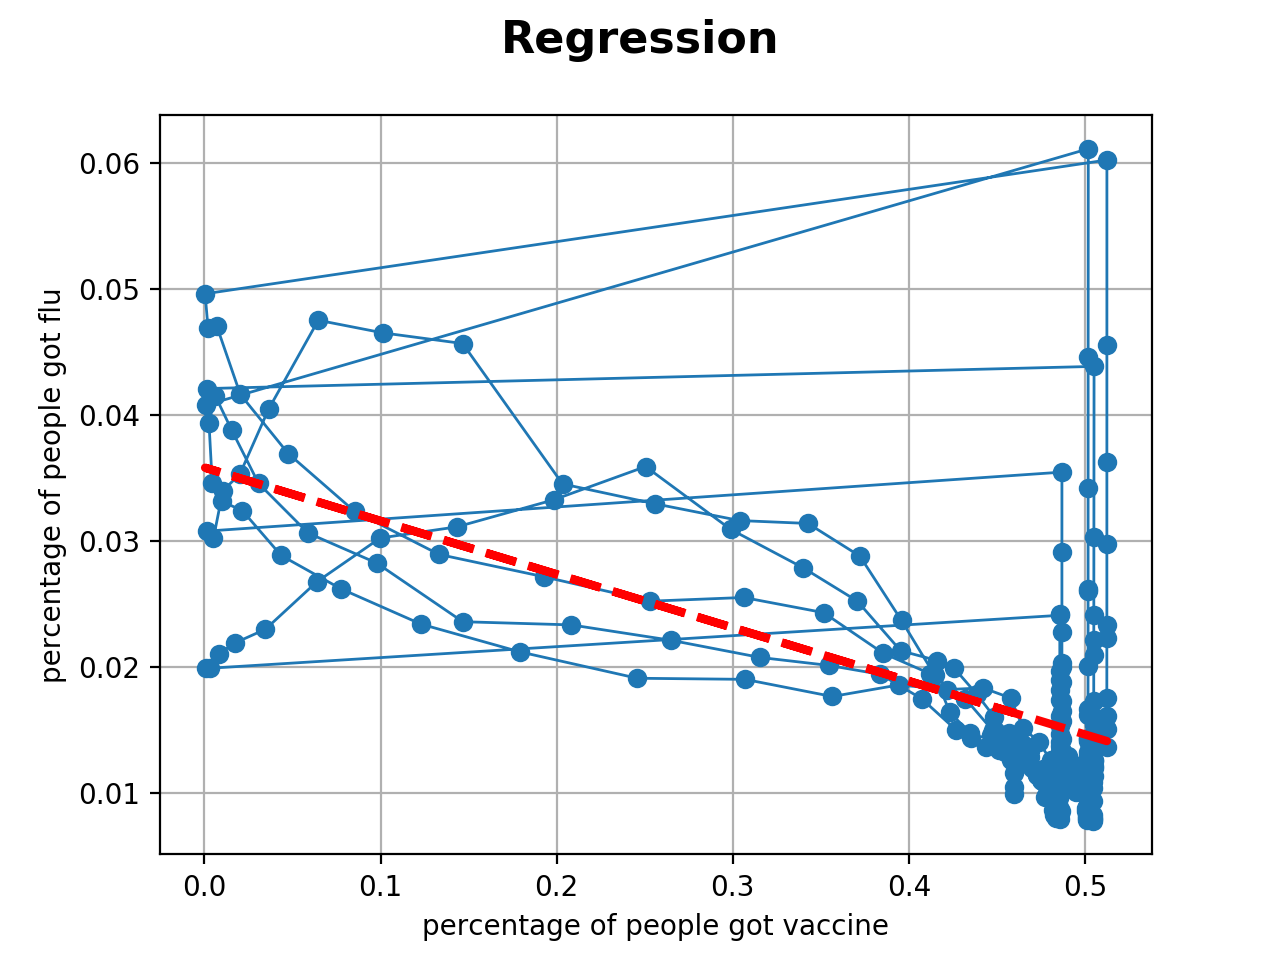

In [63]:

m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(target_df["percentage of people got vaccine"],target_df["percentage of people got flu"])
m_fit = m_slope * target_df["percentage of people got vaccine"] + m_int


fig,ax = plt.subplots(1)
fig.suptitle("Regression", fontsize=16, fontweight="bold")


plt.plot(target_df["percentage of people got vaccine"], target_df["percentage of people got flu"], linewidth=1, marker="o")
plt.plot(target_df["percentage of people got vaccine"], m_fit, "r--", linewidth=3)
plt.ylabel("percentage of people got flu")
plt.xlabel("percentage of people got vaccine")
plt.grid()

In [ ]:
# state=["VA","NY","MD"] 

# year=[2012,2013,2014]
# st_county_df = pd.DataFrame({"Year":year,"State": state,
#                              })
# st_county_df

In [27]:
states=[]
counties=[]
year=[]
count=[]

target_state=["DC","VA","NY","MD"] 
target_year=[2012,2013,2014,2015,2016,2017]
# https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/{m}/states/{x}/counties.json?ethnicity=T&medicare_status=A
for m in target_year:
    for x in target_state:
        
        data=requests.get(f"https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/{m}/states/{x}/counties.json?ethnicity=T&medicare_status=A").json()
#         print(json.dumps(data,indent=4))

        for i in range(len(data)) :
            year_order=data[i]["year"]
            year.append(year_order)    
            number_county=data[i]["count"]
            count.append(number_county)
            state=data[i]["state"]
            states.append(state)
            county=data[i]["name"]
            counties.append(county)


county_df=pd.DataFrame({"Year":year,"State":states,"County":counties,"Number of people got vaccine":count})
county_df
# sum_states=county_df.groupby(["State","Year"]).sum()
# sum_states    
        

,Year,State,County,Number of people got vaccine
0,2012,DC,DISTRICT OF COLUMBIA,39527
1,2012,VA,ACCOMACK,5597
2,2012,VA,ALBEMARLE,9910
3,2012,VA,ALEXANDRIA CITY,8331
4,2012,VA,ALLEGHANY,1451
5,2012,VA,AMELIA,24
6,2012,VA,AMHERST,4501
7,2012,VA,APPOMATTOX,1849
8,2012,VA,ARLINGTON,11682
9,2012,VA,AUGUSTA,6620


In [ ]:
states=[]
counties=[]
year=[]
count=[]

target_state=["DC","VA","NY","MD"] 
target_year=[2012,2013,2014,2015,2016,2017]
# https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/{m}/states/{x}/counties.json?ethnicity=T&medicare_status=A
for m in target_year:
    for x in target_state:
        try:
            data=requests.get(f"https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/{m}/states/{x}/counties.json?ethnicity=T&medicare_status=A").json()
#         print(json.dumps(data,indent=4))
        
            for i in range(len(data)) :
                year_order=data[i]["year"]
                year.append(year_order)    
                number_county=data[i]["count"]
                count.append(number_county)
                state=data[i]["state"]
                states.append(state)
                county=data[i]["name"]
                counties.append(county)

                print(f"the total number of people who get vaccine in {year_order}  for {state} {county} week is {number_county}." )
        except:
            print("....")
county_df=pd.DataFrame({"Year":year,"State":states,"County":counties,"Number of people got vaccine":count})
county_df
    


In [ ]:
# don't use this one , zip comes with pairs
states=[]
counties=[]
year=[]
count=[]

state=["DC","VA","NY","MD"] 
target_year=[2012,2013,2014,2015,2016,2017]
# https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/{m}/states/{x}/counties.json?ethnicity=T&medicare_status=A
for m,x in zip(target_year,state):    
    data=requests.get(f"https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/{m}/states/{x}/counties.json?ethnicity=T&medicare_status=A").json()
#     print(json.dumps(data,indent=4))
    for i in range(len(data)) :
        year_order=data[i]["year"]
        year.append(year_order)    
        number_county=data[i]["count"]
        count.append(number_county)
        state=data[i]["state"]
        states.append(state)
        county=data[i]["name"]
        counties.append(county)

#         print(f"the total number of people who get vaccine in {year_order}  for {state} {county} week is {number_county}." )

county_df=pd.DataFrame({"Year":year,"State":states,"County":counties,"Number of people got vaccine":count})
county_df
    
    